In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import math
import random as randn
import datetime
from pandas import Series, DataFrame
from bokeh.plotting import figure
from bokeh.io import output_file, show
%matplotlib inline
import nltk
import scipy.sparse as sparse
from datetime import datetime


In [145]:
hot = pd.read_csv('/Users/Priya/Downloads/datafiniti-hotel-reviews/7282_1.csv')
hot.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [146]:
hot.rename(columns = {'reviews.date':'reviews_date', "reviews.dateAdded":"reviews_dateAdded","reviews.doRecommend":"reviews_doRecommend","reviews.id":"reviews_id","reviews.rating":"reviews_rating", "reviews.text":"reviews_text","reviews.title":"reviews_title","reviews.userCity":"reviews_userCity","reviews.username":"reviews_username","reviews.userProvince":"reviews_userProvince"}, inplace = True)
hot.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews_date,reviews_dateAdded,reviews_doRecommend,reviews_id,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_username,reviews_userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [147]:
# Top 10 hotels with most reviews. 

hot_revs = hot[['name', 'reviews_text']]
hot_revs.head(10)

,name,reviews_text
0,Hotel Russo Palace,Pleasant 10 min walk along the sea front to th...
1,Hotel Russo Palace,Really lovely hotel. Stayed on the very top fl...
2,Hotel Russo Palace,Ett mycket bra hotell. Det som drog ner betyge...
3,Hotel Russo Palace,We stayed here for four nights in October. The...
4,Hotel Russo Palace,We stayed here for four nights in October. The...
5,Hotel Russo Palace,We loved staying on the island of Lido! You ne...
6,Hotel Russo Palace,Lovely view out onto the lagoon. Excellent vie...
7,Hotel Russo Palace,ottimo soggiorno e ottima sistemazione nei gio...
8,Hotel Russo Palace,Gnstiger Ausgangspunkt fr Venedig Besuche. Ruh...
9,Hotel Russo Palace,Lidoen er perfekt til et par dages ro og afsla...


In [148]:
hot_revs_most = hot_revs['name'].value_counts()
print('Top 10 hotels with most reviews:')
hot_revs_most.head(10)

Top 10 hotels with most reviews:


The Alexandrian, Autograph Collection          1185
Howard Johnson Inn - Newburgh                   714
Americas Best Value Inn                         567
Fiesta Inn and Suites                           546
Ip Casino Resort Spa                            392
Best Western Plus Waterville Grand Hotel        335
Hampton Inn Virginia Beach Oceanfront North     334
Comfort Suites                                  326
New York Marriott Marquis                       320
Best Western of Long Beach                      317
Name: name, dtype: int64

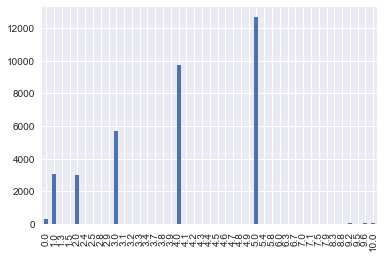

In [149]:
(hot.reviews_rating).value_counts().sort_index().plot(kind='bar')

In [150]:
hot_rr = hot[['reviews_rating','reviews_text']]

In [151]:
# Finding the missing values in ratings and text

hot_rr.isnull().sum()

reviews_rating    862
reviews_text       22
dtype: int64

In [152]:
# Filling out the missing values for ratings and text 

hot['reviews_rating'].fillna('method=pad').head()

0    4
1    5
2    5
3    5
4    5
Name: reviews_rating, dtype: object

In [153]:
hot['reviews_text'].fillna('NA').head()

0    Pleasant 10 min walk along the sea front to th...
1    Really lovely hotel. Stayed on the very top fl...
2    Ett mycket bra hotell. Det som drog ner betyge...
3    We stayed here for four nights in October. The...
4    We stayed here for four nights in October. The...
Name: reviews_text, dtype: object

In [154]:
hot['reviews_text'].head()

0    Pleasant 10 min walk along the sea front to th...
1    Really lovely hotel. Stayed on the very top fl...
2    Ett mycket bra hotell. Det som drog ner betyge...
3    We stayed here for four nights in October. The...
4    We stayed here for four nights in October. The...
Name: reviews_text, dtype: object

In [155]:
#Calculating the mean of all the reviews in the dataset.

rr = hot['reviews_rating']
mean = np.mean(rr)
mean


3.7764308131241124

In [156]:
rt_rr = hot[['reviews_text','reviews_rating']]

In [157]:
hot['reviews_text'].head()

0    Pleasant 10 min walk along the sea front to th...
1    Really lovely hotel. Stayed on the very top fl...
2    Ett mycket bra hotell. Det som drog ner betyge...
3    We stayed here for four nights in October. The...
4    We stayed here for four nights in October. The...
Name: reviews_text, dtype: object

In [158]:
# The total number of ratings for each number from 1 - 10

hot.groupby('reviews_rating')['reviews_text'].count()

reviews_rating
0.0       337
1.0      3065
1.3         1
1.5         1
2.0      2978
2.4         4
2.5         3
2.8         1
2.9         1
3.0      5705
3.1         7
3.2         2
3.3         6
3.4        17
3.7         2
3.8         3
3.9         2
4.0      9747
4.1        14
4.2        22
4.3        26
4.4         6
4.5        13
4.6         7
4.7         6
4.8        25
4.9         6
5.0     12664
5.4         9
5.8         6
6.0         1
6.3        14
6.7        12
7.0         1
7.1        13
7.5        24
7.9        24
8.3        25
8.8        24
9.2        49
9.5         1
9.6        53
10.0      101
Name: reviews_text, dtype: int64

In [159]:
# Setting values 0 and 1 for ratings (0 being ratings less than 5 and 1 being ratings equal to or greater than 5)

hot["reviews_rating"] = hot["reviews_rating"].apply(lambda x: '1' if x >= 5 else '0')

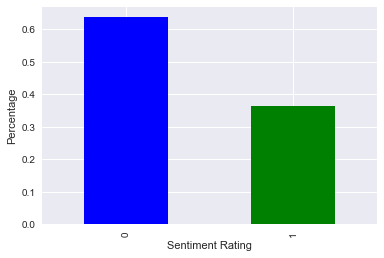

In [160]:
hot['reviews_rating'].value_counts('1').plot(kind='Bar', color=['b','g'])
plt.xlabel('Sentiment Rating')
plt.ylabel('Percentage')

In [161]:
hot['reviews_rating'].value_counts('1')*100

0    63.722433
1    36.277567
Name: reviews_rating, dtype: float64

In [162]:
# The top 10 cities from where users reviewed hotels.

hot_visit = hot[['reviews_userCity','reviews_userProvince']]
hot_visit.head()

,reviews_userCity,reviews_userProvince
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [163]:
hot_visit_most = hot_visit['reviews_userCity'].value_counts()
print('Top 10 cities from where users visited hotels:')
hot_visit_most.head(10)

Top 10 cities from where users visited hotels:


Chicago             205
Phoenix             183
New York City       151
Tempe               140
Weipa               125
Atlanta             119
Wantagh             117
Akron                99
Colorado Springs     93
Houston              91
Name: reviews_userCity, dtype: int64

In [164]:
from pandas import DataFrame

In [165]:
year = hot.reviews_date.replace({'-': ''}, regex=True)
year = year.apply(np.float)
year = year//10000
pd.set_option('precision', 0)
year.head()

ValueError: could not convert string to float: '20130922T00:00:00Z'

In [166]:
month = hot.reviews_date.replace({'-': ''}, regex=True)
month = month.apply(np.float)
month = month//10000
pd.set_option('precision', 0)
month.head()

ValueError: could not convert string to float: '20130922T00:00:00Z'

In [167]:
hot.reviews_date.dtype

dtype('O')

In [168]:
from datetime import datetime

In [169]:
# The months during which hotels were reviewed the most

hot_revdate = hot[['name', 'reviews_date']]
hot_revdate.head(10)

,name,reviews_date
0,Hotel Russo Palace,2013-09-22T00:00:00Z
1,Hotel Russo Palace,2015-04-03T00:00:00Z
2,Hotel Russo Palace,2014-05-13T00:00:00Z
3,Hotel Russo Palace,2013-10-27T00:00:00Z
4,Hotel Russo Palace,2015-03-05T00:00:00Z
5,Hotel Russo Palace,2015-04-05T00:00:00Z
6,Hotel Russo Palace,2014-06-10T00:00:00Z
7,Hotel Russo Palace,2015-05-14T00:00:00Z
8,Hotel Russo Palace,2015-09-14T00:00:00Z
9,Hotel Russo Palace,2015-05-16T00:00:00Z


In [170]:
hot_revdate_most = hot_revdate['reviews_date'].value_counts()
print('Months in which hotels were reviewed the most:')
hot_revdate_most.head(10)

Months in which hotels were reviewed the most:


2016-07-25T00:00:00Z    113
2016-07-01T00:00:00Z    105
2016-06-24T00:00:00Z    104
2016-07-22T00:00:00Z    103
2016-07-15T00:00:00Z    102
2016-07-02T00:00:00Z    102
2016-06-27T00:00:00Z     99
2016-06-17T00:00:00Z     96
2016-07-29T00:00:00Z     95
2016-07-24T00:00:00Z     93
Name: reviews_date, dtype: int64

In [171]:
hot['reviews_date'].head()

0    2013-09-22T00:00:00Z
1    2015-04-03T00:00:00Z
2    2014-05-13T00:00:00Z
3    2013-10-27T00:00:00Z
4    2015-03-05T00:00:00Z
Name: reviews_date, dtype: object

In [172]:
d = datetime.strptime('2016-01-01', '%Y-%m-%d')
d.strftime('%B')


'January'

In [173]:
year = hot.reviews_date.replace({'-': ''}, regex=True)
year = year.apply(np.float)
year = year//10000
pd.set_option('precision', 0)
year.head()

ValueError: could not convert string to float: '20130922T00:00:00Z'

In [174]:
# The provinces of users who reviewd hotels the most:

rev_upro = hot[['reviews_userProvince']]
rev_upro.head()

,reviews_userProvince
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [175]:
rev_upro_most = rev_upro['reviews_userProvince'].value_counts()
print('Top 10 provinces from where users reviewed the hotels most:')
rev_upro_most.head(10)

Top 10 provinces from where users reviewed the hotels most:


CA    1172
TX     951
FL     903
NY     829
IL     778
OH     758
MI     584
VA     561
CO     502
PA     498
Name: reviews_userProvince, dtype: int64

In [176]:
hot.groupby('reviews_rating')['reviews_text'].head()

0    Pleasant 10 min walk along the sea front to th...
1    Really lovely hotel. Stayed on the very top fl...
2    Ett mycket bra hotell. Det som drog ner betyge...
3    We stayed here for four nights in October. The...
4    We stayed here for four nights in October. The...
5    We loved staying on the island of Lido! You ne...
6    Lovely view out onto the lagoon. Excellent vie...
7    ottimo soggiorno e ottima sistemazione nei gio...
8    Gnstiger Ausgangspunkt fr Venedig Besuche. Ruh...
9    Lidoen er perfekt til et par dages ro og afsla...
Name: reviews_text, dtype: object

In [181]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer


[nltk_data] Downloading package punkt to /Users/Priya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [182]:
from six.moves import range
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer